In [1]:
import pandas as pd
import json

In [2]:
import os
if 'R_HOME' not in os.environ:
  os.environ['R_HOME'] = '/usr/lib/R'

In [3]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: Setting LC_CTYPE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: Setting LC_COLLATE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 3: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 4: Setting LC_MESSAGES failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinte

In [4]:
def convert_list_of_dicts_into_dataframe(dict_list):
  output = {}
  for keyname in dict_list[0].keys():
    output[keyname] = []
  for item in dict_list:
    for k,v in item.items():
      output[k].append(v)
  return pd.DataFrame.from_dict(output)

#print(convert_list_of_dicts_into_dataframe([
#  {'a': 3, 'b': 5},
#  {'a': 4, 'b': 6}
#]))

In [5]:
sessions_for_user_by_day_and_goal_for_all_users = json.load(open('browser_all_session_info_sept18_v3.json'))

In [6]:
def compute_intensity(domains_and_sessions):
  #print(domains_and_sessions)
  number_of_sessions_total = 0
  number_of_sessions_where_intervention_was_seen = 0
  for domain_and_sessions in domains_and_sessions:
    domain = domain_and_sessions['domain']
    is_goal_enabled = domain_and_sessions['is_goal_enabled']
    is_goal_frequent = domain_and_sessions['is_goal_frequent']
    if not is_goal_enabled:
      continue
    for session_info in domain_and_sessions['session_info_list_for_domain']:
      number_of_sessions_total += 1
      if session_info['intervention_active'] != None:
        number_of_sessions_where_intervention_was_seen += 1
  if number_of_sessions_total == 0:
    return None
  return number_of_sessions_where_intervention_was_seen / number_of_sessions_total

def compute_intensity_other_goal_domains(domains_and_sessions, target_domain):
  number_of_sessions_total = 0
  number_of_sessions_where_intervention_was_seen = 0
  for domain_and_sessions in domains_and_sessions:
    domain = domain_and_sessions['domain']
    if domain == target_domain:
      continue
    is_goal_enabled = domain_and_sessions['is_goal_enabled']
    is_goal_frequent = domain_and_sessions['is_goal_frequent']
    if not is_goal_enabled:
      continue
    for session_info in domain_and_sessions['session_info_list_for_domain']:
      number_of_sessions_total += 1
      if session_info['intervention_active'] != None:
        number_of_sessions_where_intervention_was_seen += 1
  if number_of_sessions_total == 0:
    return None
  return number_of_sessions_where_intervention_was_seen / number_of_sessions_total

def test_compute_intensity():
  for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
    user = sessions_for_user_by_day_and_goal['user']
    for day_domains_and_sessions in sessions_for_user_by_day_and_goal['days_domains_and_sessions']:
      #if day_domains_and_sessions['is_goal_enabled'] != True:
      #  continue
      if True not in ([x['is_goal_enabled'] for x in day_domains_and_sessions['domains_and_sessions']]):
        continue
      print(compute_intensity(day_domains_and_sessions['domains_and_sessions']))
      return
#test_compute_intensity()

In [7]:
# def compute_have_preview_sessions_today(domain_and_sessions):
#   print(domain_and_sessions)

# def test_compute_have_preview_sessions_today():
#   for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
#     user = sessions_for_user_by_day_and_goal['user']
#     for day_domains_and_sessions in sessions_for_user_by_day_and_goal['days_domains_and_sessions']:
#       #if day_domains_and_sessions['is_goal_enabled'] != True:
#       #  continue
#       if True not in ([x['is_goal_enabled'] for x in day_domains_and_sessions['domains_and_sessions']]):
#         continue
#       for domain_and_sessions in day_domains_and_sessions['domains_and_sessions']:
#         print(compute_have_preview_sessions_today(domain_and_sessions))
#         return

# test_compute_have_preview_sessions_today()

In [8]:


def print_data_for_users():
  for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
    user = sessions_for_user_by_day_and_goal['user']
    if user == '6216c587462fb5fa9ca9f0e9':
      print(sessions_for_user_by_day_and_goal)
#print_data_for_users()

In [81]:
def passes_filters(filter_funcs, item):
  for filter_func in filter_funcs:
    if not filter_func(item):
      return False
  return True

def difference_ratio(a, b):
  diff = abs(a - b)
  smaller = min(abs(a), abs(b))
  if smaller == 0:
    return 1
  return diff / smaller

def make_dictlist_days(sessions_for_user_by_day_and_goal_for_all_users, item_filter_funcs=[], day_filter_funcs=[], user_filter_funcs=[]):
  output = []
  num_consistent = 0
  num_inconsistent = 0
  num_consistent_users = 0
  num_inconsistent_users = 0
  num_consistent_user_items = 0
  num_inconsistent_user_items = 0
  num_consistent_days = 0
  num_inconsistent_days = 0
  num_consistent_day_items = 0
  num_inconsistent_day_items = 0
  for sessions_for_user_by_day_and_goal in sessions_for_user_by_day_and_goal_for_all_users:
    user = sessions_for_user_by_day_and_goal['user']
    if not passes_filters(user_filter_funcs, sessions_for_user_by_day_and_goal):
      continue
    output_for_user = []
    #epoch_list = [x['epoch'] for x in sessions_for_user_by_day_and_goal['days_domains_and_sessions']]
    #first_epoch_for_user = min(epoch_list)
    #last_epoch_for_user = max(epoch_list)
    for day_domains_and_sessions in sessions_for_user_by_day_and_goal['days_domains_and_sessions']:
      output_for_day = []
      epoch = day_domains_and_sessions['epoch']
      #day_domains_and_sessions['days_since_install'] = epoch - first_epoch_for_user
      #day_domains_and_sessions['days_until_last'] = last_epoch_for_user - epoch
      if not passes_filters(day_filter_funcs, day_domains_and_sessions):
        continue
      intensity = compute_intensity(day_domains_and_sessions['domains_and_sessions'])
      for domain_and_sessions in day_domains_and_sessions['domains_and_sessions']:
        domain = domain_and_sessions['domain']
        #have_preview_sessions = compute_have_preview_sessions_today(domain_and_sessions)
        intensity_other_goals = compute_intensity_other_goal_domains(day_domains_and_sessions['domains_and_sessions'], domain)
        time_on_domain_today = domain_and_sessions['time_on_domain_today']
        time_on_domain_today_ref = domain_and_sessions['time_on_domain_today_ref']
        time_on_all_other_domains_today = domain_and_sessions['time_on_all_other_domains_today']
        time_on_all_other_domains_today_ref = domain_and_sessions['time_on_all_other_domains_today_ref']
        time_on_other_goal_domains_today = domain_and_sessions['time_on_other_goal_domains_today']
        time_on_other_goal_domains_today_ref = domain_and_sessions['time_on_other_goal_domains_today_ref']
        is_goal_enabled = domain_and_sessions['is_goal_enabled']
        is_goal_frequent = domain_and_sessions['is_goal_frequent']
        #if is_goal_enabled and difference_ratio(time_on_domain_today, time_on_domain_today_ref) > 0.2:
        #  num_inconsistent += 1
        #  #if num_inconsistent < 10:
        #  #  print(domain_and_sessions)
        #  #  print('\n')
        #  #else:
        #  #  return
        #  continue
        #if is_goal_enabled and difference_ratio(time_on_all_other_domains_today, time_on_all_other_domains_today_ref) > 0.2:
        #  num_inconsistent += 1
        #  continue
        #if is_goal_enabled and difference_ratio(time_on_other_goal_domains_today, time_on_other_goal_domains_today_ref) > 0.2:
        #  num_inconsistent += 1
        #  continue
        #if is_goal_enabled:
        #  num_consistent += 1
        newitem = {
          'user': user,
          'epoch': epoch,
          'domain': domain,
          #'have_preview_sessions': have_preview_sessions,
          'time_on_domain_today': time_on_domain_today,
          'time_on_domain_today_ref': time_on_domain_today_ref,
          'time_on_all_other_domains_today': time_on_all_other_domains_today,
          'time_on_all_other_domains_today_ref': time_on_all_other_domains_today_ref,
          'time_on_other_goal_domains_today': time_on_other_goal_domains_today,
          'time_on_other_goal_domains_today_ref': time_on_other_goal_domains_today_ref,
          'is_goal_enabled': is_goal_enabled,
          'is_goal_frequent': is_goal_frequent,
          'intensity': intensity,
          'intensity_other_goals': intensity_other_goals
        }
        #if is_goal_enabled:
        #  if not consistent_days_only(newitem):
        #    num_inconsistent += 1
        #    continue
        #  num_consistent += 1
        if not passes_filters(item_filter_funcs, newitem):
          continue
        output_for_day.append(newitem)
      exclude_inconsistent_days = True
      if exclude_inconsistent_days:
        is_day_inconsistent = False
        for item in output_for_day:
          if not consistent_days_only(item):
            is_day_inconsistent = True
        if not is_day_inconsistent:
          num_consistent_days += 1
          num_consistent_day_items += len(output_for_day)
          for item in output_for_day:
            output_for_user.append(item)
        else:
          num_inconsistent_days += 1
          num_inconsistent_day_items += len(output_for_day)
      else:
        for item in output_for_day:
          output_for_user.append(item)
    exclude_inconsistent_users = False
    if exclude_inconsistent_users:
      is_user_inconsistent = False
      for item in output_for_user:
        if not consistent_days_only(item):
          is_user_inconsistent = True
      if not is_user_inconsistent:
        num_consistent_users += 1
        num_consistent_user_items += len(output_for_user)
        for item in output_for_user:
          output.append(item)
      else:
        num_inconsistent_users += 1
        num_inconsistent_user_items += len(output_for_user)
    else:
      for item in output_for_user:
        output.append(item)
  print('num consistent ' + str(num_consistent))
  print('num inconsistent ' + str(num_inconsistent))
  print('num consistent users ' + str(num_consistent_users))
  print('num inconsistent users ' + str(num_inconsistent_users))
  print('num consistent user items ' + str(num_consistent_user_items))
  print('num inconsistent user items ' + str(num_inconsistent_user_items))
  print('num consistent days ' + str(num_consistent_days))
  print('num inconsistent days ' + str(num_inconsistent_days))
  print('num consistent day items ' + str(num_consistent_day_items))
  print('num inconsistent day items ' + str(num_inconsistent_day_items))
  return output

def make_dataframe_days(sessions_for_user_by_day_and_goal_for_all_users, item_filter_funcs=[], day_filter_funcs=[], user_filter_funcs=[]):
  #sessions_for_user_by_day_and_goal_for_all_users = get_sessions_for_user_by_day_and_goal_for_all_users()
  output = make_dictlist_days(sessions_for_user_by_day_and_goal_for_all_users, item_filter_funcs, day_filter_funcs, user_filter_funcs)
  return convert_list_of_dicts_into_dataframe(output)

def consistent_days_only(x):
  is_goal_enabled = x['is_goal_enabled']
  time_on_domain_today = x['time_on_domain_today']
  time_on_domain_today_ref = x['time_on_domain_today_ref']
  time_on_all_other_domains_today = x['time_on_all_other_domains_today']
  time_on_all_other_domains_today_ref = x['time_on_all_other_domains_today_ref']
  time_on_other_goal_domains_today = x['time_on_other_goal_domains_today']
  time_on_other_goal_domains_today_ref = x['time_on_other_goal_domains_today_ref']
  if is_goal_enabled and difference_ratio(time_on_domain_today, time_on_domain_today_ref) > 0.1:
    return False
  if is_goal_enabled and difference_ratio(time_on_all_other_domains_today, time_on_all_other_domains_today_ref) > 0.1:
    return False
  if is_goal_enabled and difference_ratio(time_on_other_goal_domains_today, time_on_other_goal_domains_today_ref) > 0.1:
    return False
  return True

# item filter funcs
def enabled_goals_only(x):
  return x['is_goal_enabled'] == True

# day filter funcs
def not_first_day(x):
  return x['days_since_install'] != 0

def not_last_day(x):
  return x['days_until_last'] != 0

# user filter funcs
def at_least_two_days(x):
  return len(x['days_domains_and_sessions']) > 1

def at_least_two_weeks(x):
  #print(len(x))
  return len(x['days_domains_and_sessions']) > 13

def exclude_blacklist(x):
  return True
  blacklist = [
    # users who changed their clock while using habitlab
    '6216c587462fb5fa9ca9f0e9',
    'b3f8a7df8e4aec23e62f7cc7',
    'a80b94f6cad4a1280dfe935a',
    '42932100873bd6c4750026a8'
  ]
  # users with too long things
  blacklist.extend(['6232e889000db7282a3cd7ee', '72cf3e73e5e4ef20e77015e7',
       '7c0c0ad786467732ee15d9b6', 'b589bdfd7b95a271d5673bf0',
       'a3cf5d18447d24cb05b18728', '11078c6dbf8bbc818a6357a9',
       '9fedb69588eb607849fbd126', '378f28934b3e04b9a7231748'
  ])
  blacklist.extend(['b96c4f7eef2ab6d081013d3b', '17e7de4f422a37ce6b911178',
       'ed86421a4167fd4d84b5dc4a', '413790b746780d4712adad4b',
       'a09f4d8b6326097b44238b62', '51a6d0a3a33e937927f6b8b9',
       '5c5f6cb12fc0f69fc739d34d', 'd16a122ead215d892cd95868',
       'ed1649f8ba47ece26dd14380', '18d5f3a11194e06a1a802d90',
       'fecd855dea0b5cbbbbced63f', 'd4067837e8d0a0c192881d57',
       'b2d4727b7b860e1dd8c006f1', '0386c60fadc95024a795ee28',
       '5e74926590582e9f959b47c8', '055bdc7d333c545546f4e555',
       '2e2f1b26e1e387f1929d1038', '4f8f02fd03f53cb7715cda29',
       'a8f400e1c3b6209200924e86', 'c73a3543e22618ae52c3d0f4',
       'e9c030c0e3b1746223357d46', 'c00429a895c7d735aa461dab',
       '340c0d124ffc2d27b34224de', 'd553788cc3f63b4e9f8f49b4',
       '636db39680b04864732c9513', 'c8d66c0d7b3573ad940047e7',
       'd936520e1e4bffc3b0c90a00', 'ca66a27ca710996cfe982a8f',
       '7a988bbeb7efa657592eb0bd', 'b20032a912d904987aff2035',
       '952dae7c74ce656c0c44d47c', 'cc0bfd403bae06d937ac2511',
       'a2a76d2344bd08dbc3d57870', '399ea30c85882508739917be',
       '8997a901ee7cc52649159415', '86a087ccbcaa033b0405a5d4',
       '3f336ef473abb889abab2ee3', '0cd836b844ea328875bfc85c',
       'a5393ef1392f76ec7ea45d02', 'd531e5c7dd7e56fd16478af1',
       '6afba4b9d880466f13ce5053', '488895cb3869126d20829eba',
       'fa609947413c5895a6b084af', '0920c05a636d5298ecb6c5df',
       '3f1645145ae40c2f92adf51c', 'f1ada863d9fed94230135f6a',
       '670eded4950658c8dea6e2e3', 'c6c893841582965a3a52f8a1',
       '40359138b6a98fe7d472c918', 'b6ba0a09743e68dc20fd353b',
       '146100b8487793c7fa8533b7', 'f614d4760db01c9bbac3d2f5',
       'efeae8b9ca8d403702b309d6', '6d22dcce7525052df1a69885'])
  return x['user'] not in blacklist

def exclude_unofficial(x):
  return x['is_user_unofficial'] == False

#df = make_dataframe_days(sessions_for_user_by_day_and_goal_for_all_users, [enabled_goals_only], [], [])
df = make_dataframe_days(sessions_for_user_by_day_and_goal_for_all_users, [enabled_goals_only], [not_first_day, not_last_day], [exclude_unofficial, exclude_blacklist])
#print(make_dataframe_days())

%Rpush df

num consistent 0
num inconsistent 0
num consistent users 0
num inconsistent users 0
num consistent user items 0
num inconsistent user items 0
num consistent days 5618
num inconsistent days 10635
num consistent day items 5683
num inconsistent day items 17852


/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


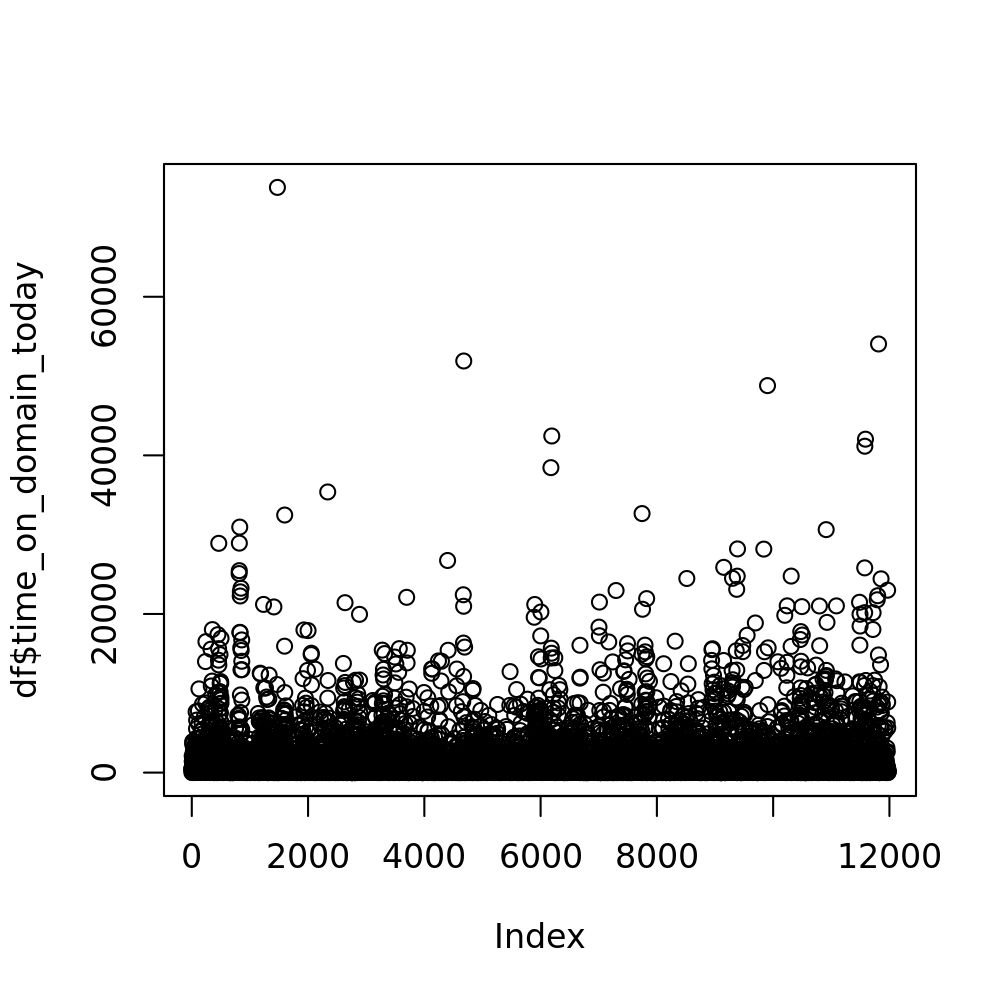

In [10]:
%%R -w 5 -h 5 --units in -r 200


plot(df$time_on_domain_today)


Error in withVisible({ : object 'ndata_all' not found


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in withVisible({ : object 'ndata_all' not found

  warnings.warn(x, RRuntimeWarning)


In [ ]:
df.dtypes

In [ ]:
#ndata = df
#ndata = ndata[ndata['is_goal_enabled'] == True]
#ndata = ndata[ndata['is_goal_frequent'] != 'inconsistent']
#ndata.shape

In [ ]:
df

In [ ]:
df[df['time_on_all_other_domains_today'] > 24*3600]['user'].unique()

In [ ]:
df['user'].unique().shape

In [ ]:
#%Rpush df

#filename = 'browser_time_on_domains_sept18.csv'
#df = pd.read_csv(filename)

In [17]:
%%R -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
library(sjPlot)
library(lmerTest)
library(stargazer)
#library(ez)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Please cite as: 


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


  warnings.warn(x, RRuntimeWarning)


In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = df
ndata = subset(ndata, time_on_domain_today > 8*1000*3600)
#summary(ndata)
show(ndata)


In [90]:
%%R -w 5 -h 5 --units in -r 200

ndata = df
ndata$domain = as.factor(ndata$domain)
ndata$user = as.factor(ndata$user)
ndata$is_goal_enabled = as.factor(ndata$is_goal_enabled)
ndata$is_goal_frequent = as.factor(ndata$is_goal_frequent)
ndata$log_time_on_domain_today = log(ndata$time_on_domain_today)
ndata$log_time_on_domain_today_ref = log(ndata$time_on_domain_today_ref)
ndata$log_time_on_other_goal_domains_today = log(ndata$time_on_other_goal_domains_today)
ndata$log_time_on_other_goal_domains_today_ref = log(ndata$time_on_other_goal_domains_today_ref)
ndata$log_time_on_all_other_domains_today = log(ndata$time_on_all_other_domains_today)
ndata$log_time_on_all_other_domains_today_ref = log(ndata$time_on_all_other_domains_today_ref)
#ndata = subset(ndata, domain == 'www.facebook.com' | domain == 'www.youtube.com')
#ndata = subset(ndata, domain == 'www.facebook.com')
ndata$log_time_on_other_goal_domains_today[which(!is.finite(ndata$log_time_on_other_goal_domains_today))] <- 0
ndata$log_time_on_all_other_domains_today[which(!is.finite(ndata$log_time_on_all_other_domains_today))] <- 0


ndata = subset(ndata, time_on_domain_today_ref > 10) # exclude preview sessions
ndata = subset(ndata, time_on_domain_today < 12*3600) # exclude preview sessions
ndata = subset(ndata, time_on_all_other_domains_today < 12*3600) # exclude preview sessions


ndata_all = ndata
ndata_noyoutube = subset(ndata, domain != 'www.youtube.com')
ndata_youtube = subset(ndata, domain == 'www.youtube.com')
ndata_facebook = subset(ndata, domain == 'www.facebook.com')

#ndata = subset(ndata, time_on_other_goal_domains_today != 0)
summary(ndata)

                       user          epoch                    domain    
 7091ddea4a2a1d95229133d2:  75   Min.   :947.0   www.facebook.com:1770  
 a60b8c7c2366a17d698f17d1:  67   1st Qu.:963.0   www.youtube.com :1539  
 86b2a8c8b5c9073b8947d3fb:  60   Median :971.0   twitter.com     : 743  
 88567ff29aee7fb739979824:  60   Mean   :970.2   www.reddit.com  : 497  
 a1c0a91106325e1d1c9ef2fd:  56   3rd Qu.:978.0   mail.google.com : 435  
 eba693ff2cc67e6a1530697d:  55   Max.   :985.0   www.amazon.com  : 314  
 (Other)                 :5099                   (Other)         : 174  
 time_on_domain_today time_on_domain_today_ref time_on_all_other_domains_today
 Min.   :   11.0      Min.   :   11.0          Min.   :    1                  
 1st Qu.:  186.0      1st Qu.:  186.0          1st Qu.: 4792                  
 Median :  580.5      Median :  580.5          Median : 8370                  
 Mean   : 1372.2      Mean   : 1370.9          Mean   : 9795                  
 3rd Qu.: 1586.2     

In [ ]:
#%%R -w 5 -h 5 --units in -r 200
#plot(ndata$time_on_domain_today)

In [91]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today_ref ~ is_goal_frequent + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)
#class(results) <- "lmerMod"
#stargazer(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today_ref ~ is_goal_frequent + (1 | domain)
   Data: ndata

REML criterion at convergence: 20074.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.74320 -0.64827  0.09627  0.73556  2.50887 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 0.2671   0.5169  
 Residual             2.2799   1.5099  
Number of obs: 5472, groups:  domain, 10

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)             6.11450    0.18018    7.29745  33.936 2.67e-09 ***
is_goal_frequentTRUE   -0.02297    0.04093 5463.17808  -0.561    0.575    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.109


In [86]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals +  
    (1 | domain)
   Data: ndata

REML criterion at convergence: 22384.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9636 -0.5638  0.1430  0.7194  2.6200 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 0.2644   0.5142  
 Residual             2.9874   1.7284  
Number of obs: 5683, groups:  domain, 10

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              5.95618    0.18357    8.30527  32.447 4.82e-10 ***
is_goal_frequentTRUE     0.02908    0.04604 5674.03627   0.632    0.528    
intensity_other_goals   -0.08177    0.05735 5673.24504  -1.426    0.154    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) i__TRU
is_gl_fTRUE -0.109       
intnsty_th_

In [87]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_all_other_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log_time_on_all_other_domains_today ~ is_goal_frequent + (1 |  
    domain)
   Data: ndata

REML criterion at convergence: 14456.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.2982  -0.4987   0.1442   0.6879   2.8703 

Random effects:
 Groups   Name        Variance Std.Dev.
 domain   (Intercept) 0.007462 0.08638 
 Residual             0.742240 0.86153 
Number of obs: 5683, groups:  domain, 10

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           8.922e+00  3.632e-02  7.066e+00 245.649 3.73e-15 ***
is_goal_frequentTRUE -1.904e-03  2.291e-02  5.679e+03  -0.083    0.934    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
is_gl_fTRUE -0.296


In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

In [ ]:
#%%R -w 5 -h 5 --units in -r 200

#ndata = df
#subset(ndata, time_on_domain_today == 105384637)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
summary(ndata)


In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + intensity_other_goals + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user) + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user) + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lm(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_youtube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lm(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_noyoutube
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain) + (1|user), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|user), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_all
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|user) + (1|domain), data = ndata)
summary(results)

In [ ]:
%%R -w 5 -h 5 --units in -r 200

ndata = ndata_facebook
#results <- lmer(time_on_domain_today ~ is_goal_frequent + (time_on_other_goal_domains_today) + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user) + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|domain) , data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (1|user), data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lm(log_time_on_domain_today ~ is_goal_frequent, data = ndata)
#results <- lmer(log_time_on_domain_today ~ is_goal_frequent + (log_time_on_other_goal_domains_today) + (1|user), data = ndata)
results <- lmer(log_time_on_other_goal_domains_today ~ is_goal_frequent + (1|user), data = ndata)
summary(results)